# Lesson 19: 아이스크림을 많이 먹으면 걸리는 병

최규빈  
2023-07-26

<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day3/08_ggplot2/2023-02-01-Lesson17.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

# 아이스크림을 많이 먹으면 걸리는 병 (1)

`-` ref- [데이터 과학자의 사고법: 더 나은 선택을 위한 통계학적 통찰의
힘](https://github.com/guebin/DV2022/blob/master/posts/ds.pdf)

-   구매할만한 책입니다

`-` 내용요약

-   여름 $\to$ 수영장 $\to$ 소아마비
-   여름 $\to$ 아이스크림
-   아이스크림과 소아마비는 상관관계가 높다: 아이스크림 성분중에서
    소아마비를 유발하는 유해물질이 있을 것이다 (?)

`-` 아래와 같이 모형을 간단하게 하자.

-   온도 $\to$ 소아마비
-   온도 $\to$ 아이스크림

## Toy exam

`-` 교재의 예제상황은 예를들면 아래와 같다.

(숨은진짜상황1)

$$\text{아이스크림 판매량} = 20 + 2 \times \text{온도} + \epsilon$$

In [3]:
np.random.seed(1) 
temp= np.array([-10.2, -5.2, 0.1, 10.1, 12.2, 14.7, 
                25.4, 26.8, 28.9, 35.1, 32.2, 34.6])
eps= np.random.normal(size=12,scale=5)
icecream= 20 + temp * 2 + eps

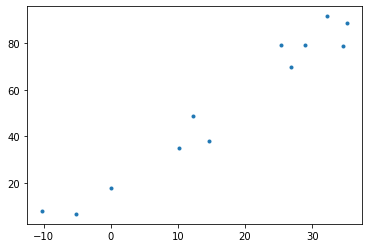

In [49]:
plt.plot(temp,icecream,'.')

-   온도와 아이스크림 판매량의 산점도

(숨은진짜상황2)

$$\text{소아마비 반응수치} = 30 + 0.5 \times \text{온도} + \epsilon$$ -
좌변은 소아마비임을 나타내는 어떠한 반응수치라고 생각하자.

In [5]:
np.random.seed(2) 
eps = np.random.normal(size=12,scale=5) 
disease = 30+ temp* 0.5 + eps

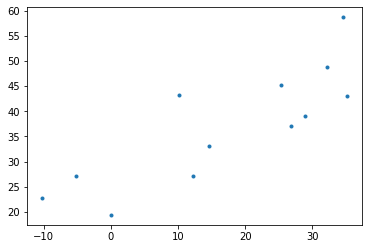

In [6]:
plt.plot(temp,disease,'.')

-   온도와 소아마비의 산점도

**(우리가 데이터로부터 관측한 상황)**

`-` 아이스크림과 질병의 산점도를 그려보자.

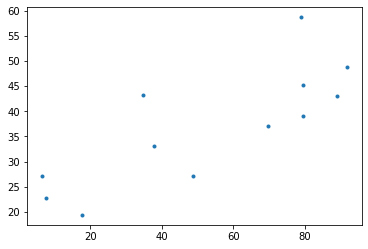

In [52]:
plt.plot(icecream,disease,'.')

-   양의 상관관계에 있다.

`-` 아이스크림 중 어떠한 물질이 소아마비를 일으키는것이 분명하므로
(인과성이 분명해보이니까) 아래와 같은 모형을 세우자. \<– 여기서부터
틀렸음

$${\tt disease}_i =\beta_0 +\beta_1 {\tt icecream}_i +\epsilon_i,\quad \textbf{for} ~~ i=1,2,\dots, 12$$

`-` 적절한 $\beta_0$와 $\beta_1$을 추정하면 우리는 아이스크림과
소아마비의 관계를 알 수 있다. \<– 틀린주장

-   틀린 모형
-   도데체 우리가 뭘 잘못했는가?

`-` 두 변수 사이에 상관관계가 있어도 실제 원인은 다른 변수에 숨겨져 있는
경우가 많다.

(ex1)

-   온도 $\to$ 익사
-   온도 $\to$ 아이스크림
-   아이스크림과 익사자도 양의 상관관계에 있을것이다.
-   아이스크림을 먹이면 물에 빠져 죽는다 $\to$ 틀린주장
-   사실 기온이 숨겨진 원인이다. 기온이 증가하면 아이스크림 판매량도
    증가하고 폭염때문에 익사사고율도 높아지는 구조이다.

(ex2)

-   인구수 $\to$ 교회
-   인구수 $\to$ 범죄건수
-   지역별 교회와 범죄건수를 살펴보면 상관관계가 높게 나올것임
-   교회를 지으면 범죄건수도 증가한다? $\to$ 틀린주장
-   사실 인구가 숨겨진 요인임

`-` ex2, ex1에 대하여 바른 분석을 하려면?

-   ex2: 인구가 비슷한 도시끼리 묶어서 비교해보면 교회와 범죄의 건수는
    양의 상관관계에 있지 않을것임
-   ex1: 온도가 비슷한 그룹끼리 묶어보자.

`-` 올바른 분석: 온도가 비슷한 그룹끼리 묶어서 그려보자. $\to$
상관계수가 줄어들 것이다.

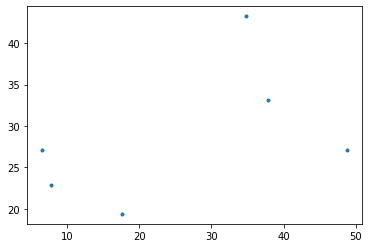

In [53]:
plt.plot(icecream[:6],disease[:6],'.')

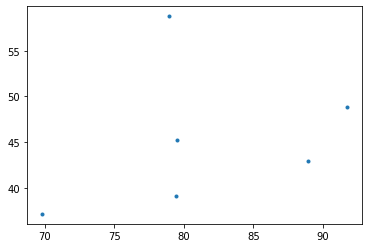

In [54]:
plt.plot(icecream[6:],disease[6:],'.')

-   진짜로 선형관계가 약해졌다..

# 아이스크림을 많이 먹으면 걸리는 병 (2)

## 자료생성: 좀 더 그럴듯한 자료 (만들기)

`-` 지난 시간의 toy example은 데이터가 너무 작아서 억지스러움 $\to$
[기상자료개방포털](https://data.kma.go.kr/cmmn/main.do), 회원가입해야
자료받을 수 있음.

In [3]:
_df=pd.read_csv('https://raw.githubusercontent.com/guebin/DV2022/master/posts/temp.csv')
_df

`-` 평균기온만 선택

In [4]:
pd.Series(_df.columns)

In [5]:
temp = np.array(_df.iloc[:,3])
temp[:5]

### `#` 숨은진짜상황1: 온도 $\to$ 아이스크림 판매량

`-` 아래와 같은 관계가 있다고 하자.

$$\text{아이스크림 판매량} = 20 + 2 \times \text{온도} + \epsilon$$

In [6]:
np.random.seed(1)
eps = np.random.normal(size=len(temp), scale=10) 
icecream = 20 + 2*temp + eps

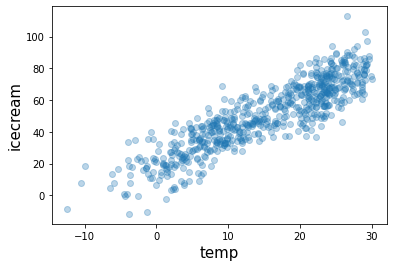

In [7]:
plt.plot(temp,icecream,'o',alpha=0.3)
plt.xlabel("temp",size=15)
plt.ylabel("icecream",size=15)

### `#` 숨은진짜상황2: 온도 $\to$ 소아마비 반응수치

`-` 아래와 같은 관계가 있다고 하자.

$$\text{소아마비 반응수치} = 30 + 0.5 \times \text{온도} + \epsilon$$

In [8]:
np.random.seed(2) 
eps=np.random.normal(size=len(temp),scale=1)
disease= 30 + 0.5 * temp + eps

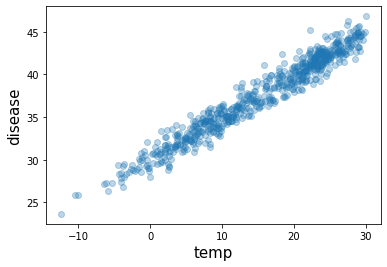

In [9]:
plt.plot(temp,disease,'o',alpha=0.3)
plt.xlabel("temp",size=15)
plt.ylabel("disease",size=15)

### `#` 우리가 관측한 상황 (온도는 은닉되어있음)

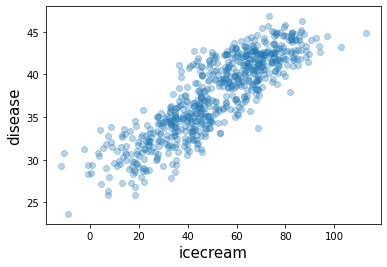

In [10]:
plt.plot(icecream,disease,'o',alpha=0.3)
plt.xlabel("icecream",size=15)
plt.ylabel("disease",size=15)

In [11]:
np.corrcoef(icecream,disease)

-   0.86정도..

## 직관: 여름만 뽑아서 plot 해보자.

`-` temp\>25 (여름으로 간주) 인 관측치만 플랏

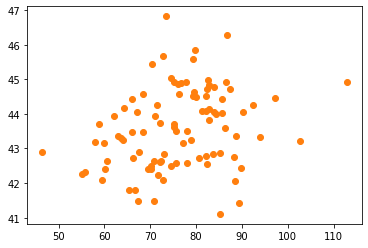

In [12]:
plt.plot(icecream[temp>25],disease[temp>25], 'o', color='C1') ## 평균기온이 25도가 넘어가면 여름이라 생각 

`-` 전체적인 산점도

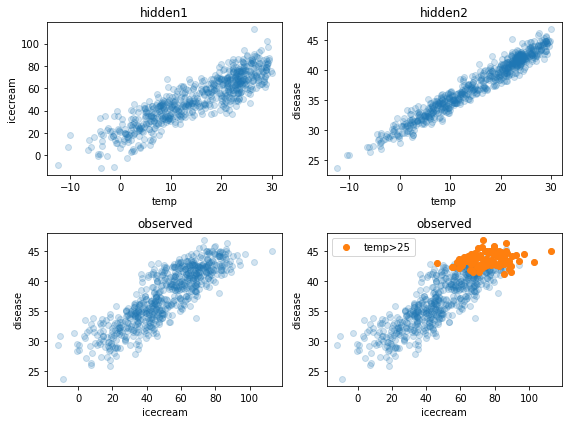

In [13]:
fig , ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2,figsize=(8,6)) 
ax1.plot(temp,icecream,'o',alpha=0.2); ax1.set_xlabel('temp'); ax1.set_ylabel('icecream'); ax1.set_title("hidden1")
ax2.plot(temp,disease,'o',alpha=0.2); ax2.set_xlabel('temp'); ax2.set_ylabel('disease'); ax2.set_title("hidden2")
ax3.plot(icecream,disease,'o',alpha=0.2); ax3.set_xlabel('icecream'); ax3.set_ylabel('disease'); ax3.set_title("observed")
ax4.plot(icecream,disease,'o',alpha=0.2); ax4.set_xlabel('icecream'); ax4.set_ylabel('disease'); ax4.set_title("observed")
ax4.plot(icecream[temp>25],disease[temp>25],'o',label='temp>25')
ax4.legend()
fig.tight_layout()

## ggplot: 온도구간을 세분화 하여 시각화

`-` 목표: 모든 온도구간에 대하여 각각 색을 다르게 하여 그려보자.

-   사실 지금 변수는 온도, 아이스크림판매량, 소아마비
-   온도가 유사한 지역을 색으로 묶으면 3차원 플랏이 가능함

#### `#` df로 자료정리

`-` 일단 데이터 프레임을 정리하자.

In [14]:
df = pd.DataFrame({'temp':temp,'icecream':icecream,'disease':disease})
df

### `#` 구간세분화

`-` 온도를 카테고리화 하자 $\to$ 적당한 구긴을 설정하기 위해서
히스토그램을 그려보자.

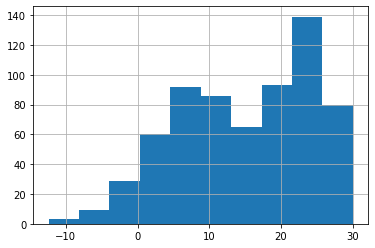

In [15]:
df.temp.hist() # ? 이거 14주차쯤 배우는데 미리 스포합니다.. 엄청 편해요 

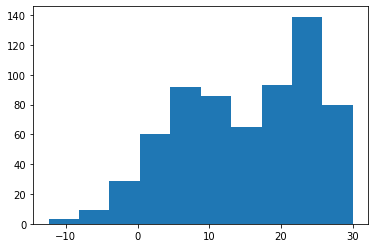

In [16]:
plt.hist(df.temp) # 원래는 이걸 배웠죠

`-` 구간은 5정도로 하면 적당할 것 같다.

In [17]:
def cut(x): # 이거보다 더 좋은 방법이 있을 것 같긴 한데요..
    if x<0: 
        y='Temp: <0'
    elif x<5: 
        y='Temp: 0~5'
    elif x<10: 
        y='Temp: 5~10'
    elif x<15: 
        y='Temp: 10~15'
    elif x<20:
        y='Temp: 15~20'
    elif x<25: 
        y='Temp: 20~25'
    else: 
        y='Temp: >30'
    return y 

In [18]:
df.assign(temp2 = list(map(cut,df.temp)))

### `#` ggplot

`-` 온도를 색으로 구분하면

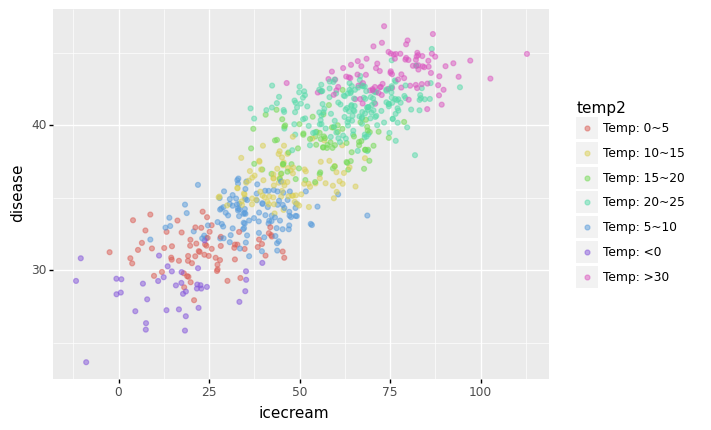

In [19]:
fig = ggplot(data=df.assign(temp2 = list(map(cut,df.temp))))
p1 = geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.5)
fig + p1

`-` 추세선을 추가하면

In [20]:
l1 = geom_smooth(aes(x='icecream',y='disease',colour='temp2'))

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.

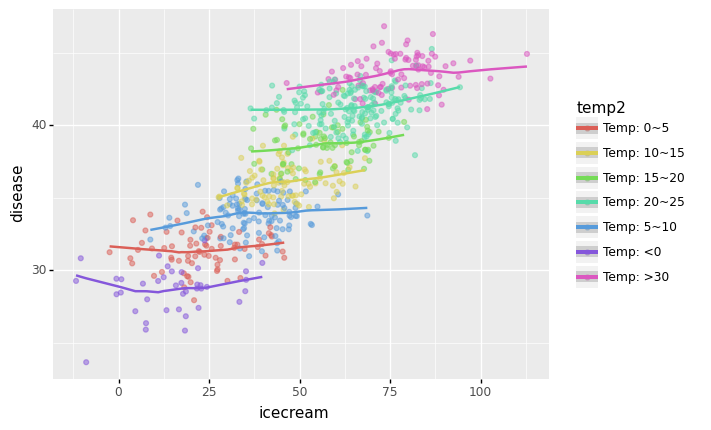

In [21]:
fig+p1+l1

-   각 온도별로 추세선은 거의 기울기가 0이다. $\to$ 온도가 비슷한
    구간별로 묶어서 보니까 상관관계가 없다는 거!
-   아이스크림 판매량과 소아마비의 corr은 유의미해보이지만, 온도를
    통제하였을 경우 아이스크림 판매량과 소아마비의 partial corr은
    유의미해보이지 않음.

### `#` 해석

`-` 해피앤딩: 온도를 통제하니까 아이스크림과 질병은 관련이 없어보인다.
$\to$ 아이스크림을 먹으면 소아마비를 유발한다는 이상한 결론이 나올뻔
했지만 우리는 온도라는 흑막을 잘 찾았고 결과적으로
“온도-\>아이스크림판매량,소아마비” 이라는 합리적인 진리를 얻을 수
있었다.

-   온도와 같은 변수를 은닉변수라고 한다.

`-` 또 다른 흑막? 고려할 흑막이 온도뿐이라는 보장이 어디있지? 사실
흑막2, 흑막3이 있어서 그런 흑막들을 고려하다보니까 아이스크림과
소아마비사이의 상관관계가 다시 보이면 어떡하지?

-   이러한 이유 때문에 상관계수로 인과성을 유추하는건 사실상 불가능.
-   그런데 이론적으로는 “세상의 모든 은닉변수를 통제하였을 경우에도
    corr(X,Y)의 값이 1에 가깝다면 그때는 인과성이 있다고 봐도 무방함,
    (물론 이 경우에도 무엇이 원인인지는 통계적으로 따지는것이 불가)”
    이라고 주장할 수 있다. 즉 모든 흑막을 제거한다면
    “상관성=인과성”이다.

`-` 실험계획법, 인과추론: 세상의 모든 흑막을 제거하는건 상식적으로
불가능

-   피셔의주장(실험계획법): 그런데 실험계획을 잘하면 흑막을 제거한
    효과가 있음 (무작위로 사람뽑아서 담배를 피우게 한다든가)
-   인과추론: 실험계획이 사실상 불가능한 경우가 있음 $\to$ 모인
    데이터에서 최대한 흑막2,3,4,.. 등이 비슷한 그룹끼리 “매칭”을 시킨다!

## 그냥 궁금해서: 진짜 만약에 아이스크림과 소아마비가 관련있는 경우라면?

`-` 온도는 아이스크림 판매에 여전히 영향을 주지만

$$\text{아이스크림 판매량} = 20 + 2 \times \text{온도} + \epsilon$$

In [22]:
np.random.seed(1)
eps=np.random.normal(size=len(temp), scale=10) 
icecream = 20 + 2 * temp + eps 

`-` 수영장이 원인이 아니라 진짜 아이스크림을 먹고 소아마비에
걸린상황이라면?

$$\text{소아마비 반응수치} = 30 + 0 \times \text{온도} + 0.15 \times \text{아이스크림 판매량} + \epsilon$$

In [23]:
np.random.seed(2) 
eps = np.random.normal(size=len(temp),scale=2)
disease= 30+ 0*temp + 0.15*icecream + eps

In [24]:
df2=pd.DataFrame({'temp':temp,'icecream':icecream,'disease':disease})
df2.assign(temp2=list(map(cut,df2.temp)))

/home/cgb4/anaconda3/envs/py37/lib/python3.7/site-packages/plotnine/stats/smoothers.py:311: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.

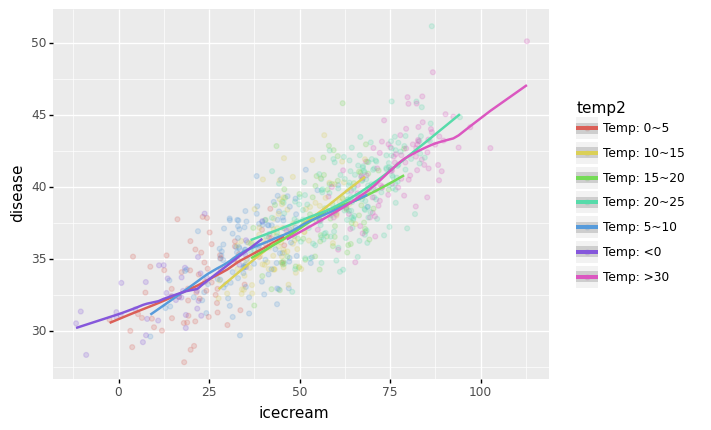

In [25]:
ggplot(data=df2.assign(temp2=list(map(cut,df2.temp))))+\
geom_point(aes(x='icecream',y='disease',colour='temp2'),alpha=0.2)+\
geom_smooth(aes(x='icecream',y='disease',colour='temp2'))

-   이번엔 partial corr도 유의미하게 나옴

`-` 단순 corr을 봐서는 “온도-\>아이스크림,소아마비” 인지,
“온도-\>아이스크림-\>소아마비” 인지 알기 어렵다.

In [26]:
df.corr()

In [27]:
df2.corr()